**Fraud Detection**

Our tasks
- Explore the dataset/Visualize
- Decide which features are important
- Perform ML
- Test the model on the testing set

In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,93115.0,-0.669191,0.654652,1.920081,-0.038924,0.172814,-0.374799,0.178804,-0.165993,1.571791,...,0.131020,0.852300,-0.355028,0.067104,0.020210,-0.178537,0.035306,0.142524,12.99,0
1,131405.0,-1.964442,-2.643355,-0.075399,-0.640973,4.837926,2.359196,-2.269547,1.362055,0.695756,...,0.549348,0.881301,0.452464,0.721327,-0.633560,-0.243287,0.192000,0.281184,9.99,0
2,171322.0,1.943347,-0.308155,-0.374548,1.133126,-0.477423,0.027901,-0.725872,0.235184,0.946384,...,0.232092,0.724530,0.109320,-0.531318,-0.140131,-0.544696,0.045037,-0.049304,1.00,0
3,63605.0,1.257631,0.394783,0.317826,0.687931,-0.323667,-1.060838,0.122387,-0.234100,-0.048409,...,-0.281747,-0.785840,0.123396,0.359982,0.234343,0.092664,-0.019484,0.031887,1.29,0
4,157723.0,1.883060,-0.142991,-0.246343,1.183543,-0.287394,0.004298,-0.405182,0.049382,0.509615,...,-0.111627,-0.221476,0.282087,-0.377408,-0.333193,-0.945848,0.056923,-0.030959,30.00,0


In [4]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud)
print(len(non_frauds))

            Time         V1         V2         V3         V4         V5  \
265     110552.0  -2.450367   2.107729  -5.140663   1.411304  -1.690780   
1669     65385.0  -2.923827   1.524837  -3.018758   3.289291  -5.755542   
2141     85573.0  -1.756712   3.266574  -4.153388   3.924526  -1.753772   
2275    160243.0  -2.783865   1.596824  -2.084844   2.512986  -1.446749   
2676    161154.0  -3.387601   3.977881  -6.978585   1.657766  -1.100500   
3420    103808.0  -4.517344   2.500224  -4.013928   1.189452  -2.486861   
3449     62467.0  -5.344665  -0.285760  -3.835616   5.337048  -7.609909   
4505     68207.0 -13.192671  12.785971  -9.906650   3.320337  -4.801176   
5016     11131.0  -1.426623   4.141986  -9.804103   6.666273  -4.749527   
5852     45463.0  -1.476893   2.122314  -1.229470   1.201849  -0.343264   
6350    160034.0  -2.349340   1.512604  -2.647497   1.753792   0.406328   
7435    155662.0  -1.928613   4.601506  -7.124053   5.716088   1.026579   
7697     48380.0  -2.7907

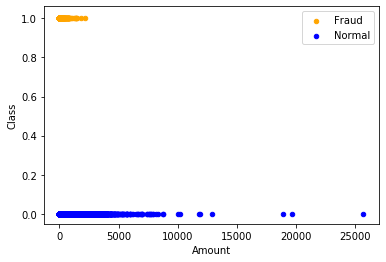

In [6]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

# try different kinds of visualizations

In [13]:
# time for machine learning!

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [14]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

# could try different test_size arguments

In [17]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))

/Users/lo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9990570107239951


In [18]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

# you don't have to use logistic regression as well

[0 0 0 ... 0 0 0]


In [12]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99506
           1       0.83      0.59      0.69       177

    accuracy                           1.00     99683
   macro avg       0.92      0.80      0.85     99683
weighted avg       1.00      1.00      1.00     99683

